# Building a Spotify Recommendation Engine for Music Labels
## Data Collection, Cleaning, and EDA
### Flatiron School Data Science Program Phase 4 Project<br>Justin Williams & Khyatee Desai

In [485]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from zipfile import ZipFile 
from sklearn import set_config
set_config(print_changed_only=False, display=None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Data Collection with Webscraping

## Sub Pop Records Artists

In [486]:
# retrieve html page and create beautifulsoup object

page = requests.get('https://www.subpop.com/artists/list')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
subpop = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a')[:-1]:
    subpop.append(name.text)

In [487]:
# add subpop artists to Labels dataframe

label_list = ['Sub Pop']*len(subpop)
to_df = zip(subpop, label_list)
subpop_df = pd.DataFrame(to_df)
subpop_df.head()

,0,1
0,10 Minute Warning,Sub Pop
1,5ive Style,Sub Pop
2,68 Comeback,Sub Pop
3,764-HERO,Sub Pop
4,A Frames,Sub Pop


## 4AD Artists

In [488]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://4ad.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
AD4 = []
artists = soup.find(id="artistlistingmain")
for name in artists.findAll('a',href=True):
    AD4.append(name.text)

In [489]:
# add 4AD artists to Labels dataframe

label_list = ['4AD']*len(AD4)
to_df = zip(AD4, label_list)
fourad_df = pd.DataFrame(to_df)
fourad_df.head()

,0,1
0,50 Foot Wave,4AD
1,A.R. Kane,4AD
2,Adrianne Lenker,4AD
3,Air Miami,4AD
4,Aldous Harding,4AD


## Fat Possum Records

In [490]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://fatpossum.com/featured-artists/all-artists/')
soup = BeautifulSoup(page.text)
soup.prettify

# # parse through soup and save artist names in a list
possum = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a',href=True, title=True):
    possum.append(name.text)

In [491]:
# add fat possum artists to dataframe

label_list = ['Fat Possum']*len(possum)
to_df = zip(possum, label_list)
possum_df = pd.DataFrame(to_df)
possum_df.head()

,0,1
0,2:54,Fat Possum
1,A. A. Bondy,Fat Possum
2,Adam Green,Fat Possum
3,Adam Torres,Fat Possum
4,Al Green,Fat Possum


## Matador Records

In [492]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://www.matadorrecords.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

matador = []
artists = soup.find(class_="artists-page")
for name in artists.findAll('a',href=True):
    if name.text:
        matador.append(name.text) 

# get alumni artists
alumns = soup.find(class_="col-section")
for name in alumns.findAll('a',href=True)[1:]:
    matador.append(name.text)

In [493]:
# add Matador artists to dataframe

label_list = ['Matador']*len(matador)
to_df = zip(matador, label_list)
matador_df = pd.DataFrame(to_df)
matador_df.head()

,0,1
0,Algiers,Matador
1,Belle and Sebastian,Matador
2,Body/Head,Matador
3,Car Seat Headrest,Matador
4,Courtney Barnett & Kurt Vile,Matador


## Third Man Records

In [494]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://thirdmanstore.com/bands')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
thirdman = []
artists = soup.find(class_="category-view")
for name in artists.findAll('a',href=True):
    thirdman.append(name.text)

In [495]:
# add third man artists to dataframe

label_list = ['Third Man']*len(thirdman)
to_df = zip(thirdman, label_list)
thirdman_df = pd.DataFrame(to_df)
thirdman_df.head()

,0,1
0,The 5.6.7.8’s,Third Man
1,Aaron Lee Tasjan,Third Man
2,ADULT.,Third Man
3,AJJ,Third Man
4,Alabama Shakes,Third Man


## XL Records

In [496]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://xlrecordings.com/buy')
soup = BeautifulSoup(page.text)
soup.prettify


# parse through soup and save artist names in a list
XL = []
artists = soup.find(class_="artists")
for name in artists.findAll('a',href=True):
    XL.append(name.text)

In [497]:
# add XL records artists to dataframe

label_list = ['XL']*len(XL)
to_df = zip(XL, label_list)
XL_df = pd.DataFrame(to_df)
XL_df.head()

,0,1
0,Adele,XL
1,Arca,XL
2,Archy Marshall,XL
3,Atoms For Peace,XL
4,Baba Stiltz,XL


## Dead Oceans

In [498]:
# retrieve html page and create beautifulsoup object (dead oceans website blocks requests, so using Wikipedia)
page = requests.get('https://en.wikipedia.org/wiki/Dead_Oceans#Artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
deadoceans = []
artists = soup.find(class_="div-col columns column-width")
for name in artists.findAll('a',href=True):
    deadoceans.append(name.text)

In [499]:
# add dead oceans artists to dataframe

label_list = ['Dead Oceans']*len(deadoceans)
to_df = zip(deadoceans, label_list)
deadoceans_df = pd.DataFrame(to_df)
deadoceans_df.head()

,0,1
0,A Place to Bury Strangers,Dead Oceans
1,Akron/Family,Dead Oceans
2,Julianna Barwick,Dead Oceans
3,Bear in Heaven,Dead Oceans
4,Better Oblivion Community Center,Dead Oceans


## Touch and Go

In [500]:
# retrieve html page and create beautiful soup object
html_page = requests.get('http://www.tgrec.com/bands/index.php')
soup = BeautifulSoup(html_page.text)

In [501]:
# parse through soup and save artist names in a list
touch_and_go = []
artists = soup.find(id="bandsContent")
for name in artists.find_all('li')[:-3]:
    touch_and_go.append(name.text)

In [502]:
# add Touch and Go artists to dataframe

label_list = ['Touch and Go']*len(touch_and_go)
to_df = zip(touch_and_go, label_list)
touchngo_df = pd.DataFrame(to_df)
touchngo_df.head()

,0,1
0,!!!,Touch and Go
1,All the Saints,Touch and Go
2,Angry Red Planet,Touch and Go
3,Arcwelder,Touch and Go
4,Arsenal,Touch and Go


## Temporary Residence

In [503]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://www.temporaryresidence.com/collections")
soup = BeautifulSoup(html_page.text)

In [504]:
# get current artists
temporary_residence = []
artists = soup.find(class_="grid-uniform")
for name in artists.findAll('p'):
    temporary_residence.append(name.text)

# get alumni artists 
alumns = soup.find_all('div', {"class":"grid-uniform"})[1]
for name in alumns.findAll('p'):
    temporary_residence.append(name.text)

In [505]:
# add Temporary Residence artists to dataframe

label_list = ['Temporary Residence']*len(temporary_residence)
to_df = zip(temporary_residence, label_list)
temp_residence_df = pd.DataFrame(to_df)
temp_residence_df.head()

,0,1
0,William Basinski,Temporary Residence
1,William Basinski + Lawrence English,Temporary Residence
2,Bruno Bavota,Temporary Residence
3,Beak>,Temporary Residence
4,Behind the Shadow Drops,Temporary Residence


### Concatenate all music label dataframes together

In [506]:
music_labels = pd.concat([subpop_df,fourad_df, possum_df, matador_df, XL_df, thirdman_df, deadoceans_df, touchngo_df, temp_residence_df], axis=0)
music_labels.rename(columns={0:'artist', 1:'label'}, inplace=True)
music_labels.sample(10)

,artist,label
155,Fugazi,Sub Pop
62,Thom Yorke,XL
105,The Hives,Third Man
45,Famous L. Renfroe,Fat Possum
181,Handsome Furs,Sub Pop
220,Thurston Moore,Matador
229,Julia Jacklin,Sub Pop
41,El-P,Fat Possum
181,R.L. Burnside,Matador
93,Fucked Up,Third Man


# Data Cleaning

In [507]:
# extract Spotify dataset from zipped folder
with ZipFile("data/datasets.zip") as z:
    main_df = pd.read_csv(z.open(z.infolist()[0].filename))

In [508]:
# look at dtypes and null
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 24.6+ MB


In [509]:
# get some descriptive statistics
main_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


### Change to datetime and create decade

In [510]:
# set release date as datetime
main_df['release_date'] = pd.to_datetime(main_df['release_date'])

In [511]:
# make year column datetime
main_df['year'] = main_df['release_date'].dt.year

In [512]:
# create decade column
main_df['decade'] = main_df['year'].apply(lambda x: str(x)[:3]+'0s')

### Map Keys/Mode

In [513]:
# change keys/mode to letter/maj/min representations
keys = {0:'C', 1:'Db',2:'D',3:'Eb',4:'E',5:'F',6:'F#',7:'G',8:'Ab',9:'A',10:'Bb',11:'B'}
modes = {0:'Minor',1:'Major'}

# create new column in df
main_df['letter_keys'] = main_df['key'].map(keys)
main_df['modes'] = main_df['mode'].map(modes)

round(main_df['letter_keys'].value_counts(normalize=True)*100, 2)

C     12.65
G     12.22
D     11.08
A     10.37
F      9.61
E      7.60
Db     7.54
Bb     7.10
Ab     6.30
B      6.23
F#     5.05
Eb     4.23
Name: letter_keys, dtype: float64

In [517]:
# create a column that concatonates key with mode
main_df['key_mode'] = main_df['letter_keys'] + " " + main_df['modes']

### Impute Outliers

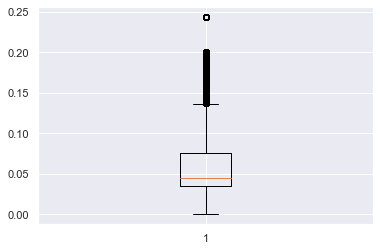

In [514]:
# Bring outliers down/up to 5 standard deviations from the mean
for feat in main_df.columns:
    try:
        abv_5_std = main_df[feat].mean()+ 5* main_df[feat].std()
        below_5_std = main_df[feat].mean()- 5* main_df[feat].std()
        conditions = [main_df[feat]>abv_5_std, main_df[feat]<below_5_std]
        choices = [abv_5_std, below_5_std]
        df[feat] = np.select(conditions, choices, main_df[feat])
    except:
        pass

# address speechiness separately, because it has a ton of upper outliers
main_df['speechiness'][main_df['speechiness']>.2] = main_df['speechiness'].mean()+ 1* main_df['speechiness'].std()
plt.boxplot(main_df['speechiness']);

### Standardize

In [515]:
# Scale features down to 0-1
main_df['scaled_speech'] = (main_df['speechiness'] - min(main_df['speechiness'])) / (max(main_df['speechiness']) - min(main_df['speechiness']))
main_df['scaled_duration'] = (main_df['duration_ms'] - min(main_df['duration_ms'])) / (max(main_df['duration_ms']) - min(main_df['duration_ms']))
main_df['scaled_loudness'] = (main_df['loudness'] - min(main_df['loudness'])) / (max(main_df['loudness']) - min(main_df['loudness']))
main_df['scaled_tempo'] = (main_df['tempo'] - min(main_df['tempo'])) / (max(main_df['tempo']) - min(main_df['tempo']))
main_df['scaled_pop'] = (main_df['popularity'] - min(main_df['popularity'])) / (max(main_df['popularity']) - min(main_df['popularity']))
main_df.sample(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop
168694,0.472000,['Chalino Sanchez'],0.444,185600,0.644,0,5aLZ7aG2P1ReLzN7ealk5b,0.001020,11,0.137,-6.819,1,Quisiera Ser Pajarillo,47,2008-01-01,0.136000,187.438,0.869,2008,2000s,B,Major,0.557388,0.033434,0.832840,0.767902,0.47
70512,0.018800,['Polo G'],0.876,202680,0.603,1,4iIfKs9XOb9D2NJnPctPns,0.000000,5,0.103,-9.148,0,BST,61,2019-06-07,0.243995,143.043,0.633,2019,2010s,F,Minor,1.000000,0.036598,0.796367,0.586023,0.61
149677,0.000509,['Whitesnake'],0.319,337637,0.905,0,0xO90cSwBkRoEqI3yOC7Gp,0.000029,4,0.358,-7.232,0,Crying in the Rain - 1987 Version; 2018 Remaster,33,1987-04-07,0.099000,128.241,0.234,1987,1980s,E,Minor,0.405746,0.061598,0.826372,0.525382,0.33


### Create Dummies

In [518]:
key_dummies = pd.get_dummies(main_df['key_mode'])
decade_dummies = pd.get_dummies(main_df['decade'])
main_df = pd.concat([main_df, key_dummies, decade_dummies], axis=1)

### Merge Labels dataframe with Spotify dataframe

In [519]:
# unpack lists in the Artists column, retain the first artist of the list
main_df['artists'] = main_df['artists'].str.slice(1,-1).str.split(',')
main_df['artists'] = main_df['artists'].map(lambda x: x[0])
main_df['artists'] = main_df['artists'].str.slice(1,-1)

In [520]:
# merge dataframes
df = main_df.merge(music_labels, left_on='artists', right_on='artist').drop('artists', axis=1)
df.sample(5)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop,key_mode,A Major,A Minor,Ab Major,Ab Minor,B Major,B Minor,Bb Major,Bb Minor,C Major,C Minor,D Major,D Minor,Db Major,Db Minor,E Major,E Minor,Eb Major,Eb Minor,F Major,F Minor,F# Major,F# Minor,G Major,G Minor,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s,artist,label
5043,0.503000,0.635,217720,0.353,0,7p3eluZv7dxIArpFUTBkia,0.000309,0,0.152,-11.341,1,All At Once,57,2008-01-01,0.0361,110.516,0.233,2008,2000s,C,Major,0.147954,0.039384,0.762023,0.452766,0.57,C Major,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Jack Johnson,Third Man
2631,0.363000,0.336,489493,0.236,0,12etrLPcBbZOk2Y8LoBiyL,0.023200,4,0.110,-15.627,0,Some Misunderstanding,40,1974-09-01,0.0294,141.911,0.131,1974,1970s,E,Minor,0.120494,0.089728,0.694903,0.581386,0.40,E Minor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Gene Clark,4AD
5739,0.018000,0.215,326040,0.912,0,1CK8xqUNltXBxLdzwRLvju,0.703000,9,0.121,-6.216,1,Death Valley '69,33,1984-07-24,0.0666,137.430,0.207,1984,1980s,A,Major,0.272956,0.059450,0.842283,0.563028,0.33,A Major,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Sonic Youth,Matador
3515,0.000144,0.285,142947,0.979,0,2piWbL2kwFYxcAEA3VD3F3,0.000000,2,0.334,-4.428,1,Territorial Pissings,30,1991-09-26,0.1750,182.700,0.108,1991,1990s,D,Major,0.717228,0.025533,0.870284,0.748491,0.30,D Major,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Nirvana,Sub Pop
982,0.585000,0.573,152400,0.484,0,6MZkstAnLzlCF1wc7t0xHi,0.000009,0,0.209,-13.672,1,Your Cheatin' Heart - 1964 Version,27,1964-05-13,0.0653,119.798,0.747,1964,1960s,C,Major,0.267628,0.027284,0.725519,0.490792,0.27,C Major,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Jerry Lee Lewis,Third Man


In [521]:
df['label'].value_counts()

Third Man              3608
Sub Pop                 964
Fat Possum              615
Matador                 486
4AD                     473
XL                      438
Dead Oceans              81
Touch and Go             62
Temporary Residence      48
Name: label, dtype: int64

# Exploratory Data Analysis
### Distribution of songs by year

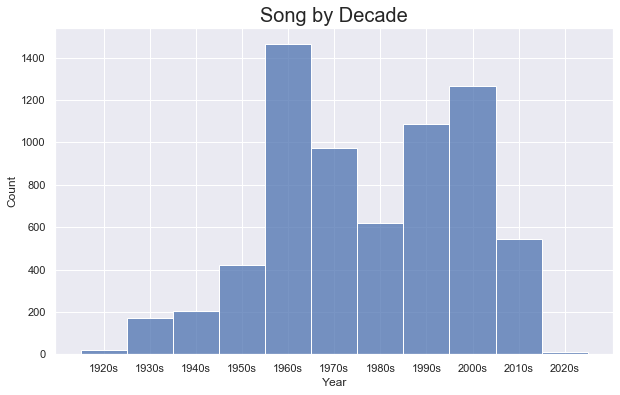

In [458]:
# distribution of songs by decade
sns.set_theme(context='notebook')
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df['decade'].sort_values(), bins='auto')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Song by Decade', fontdict={'fontsize':20});

### Distribution of songs by year, by Record Label

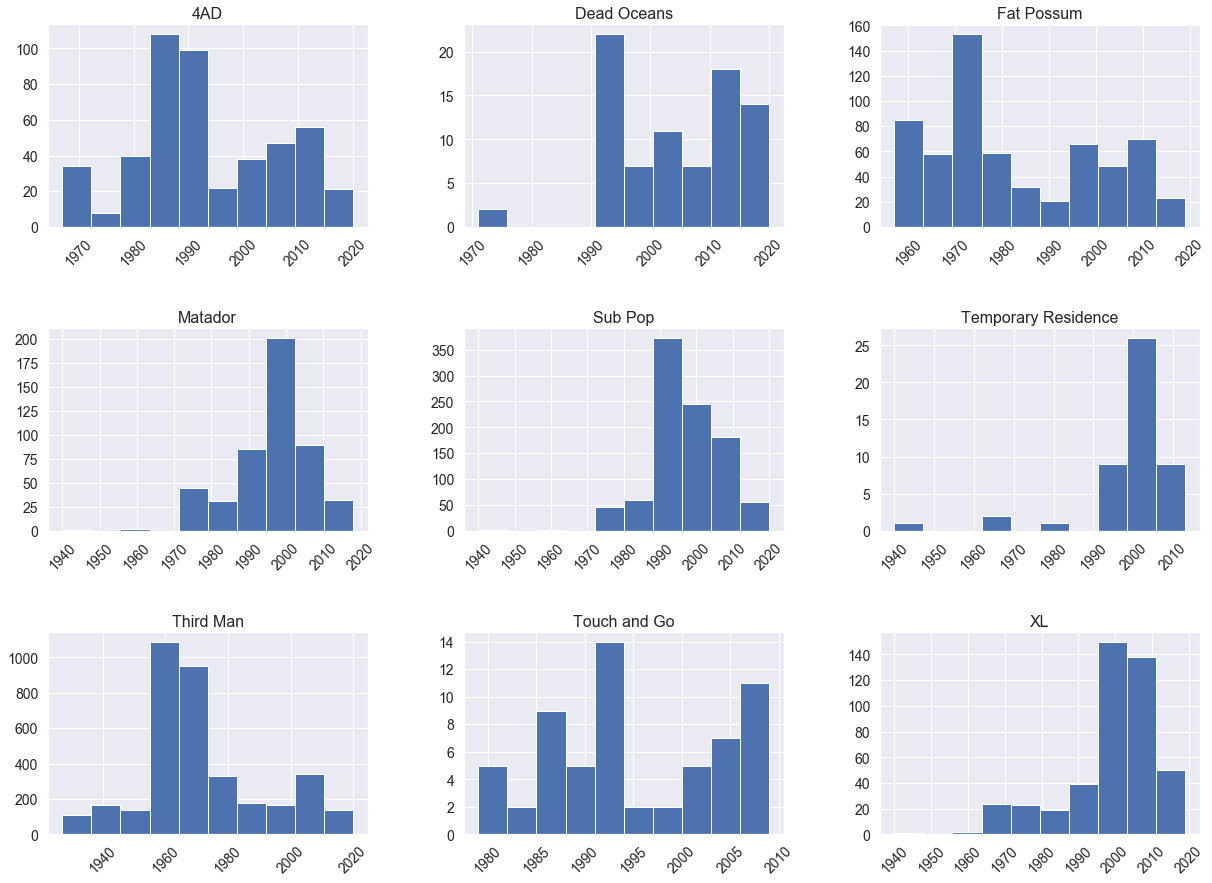

In [459]:
# look at distribution by year for by label
fig = df['year'].hist(by=df['label'],
                xrot=45,
                xlabelsize=14,
                ylabelsize=14,
                figsize=(20,15))
[x.title.set_size(16) for x in fig.ravel()];


## Song Attributes Compared with Popularity

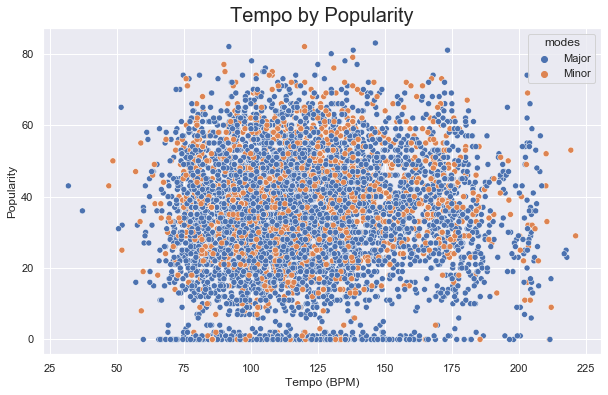

In [460]:
# tempo by popularity
plt.figure(figsize=(10,6))
sns.scatterplot(y='popularity', x='tempo', hue='modes', data=df)
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.title('Tempo by Popularity', fontdict={'fontsize':20});

In [461]:
df['modes'].value_counts()

Major    5168
Minor    1615
Name: modes, dtype: int64

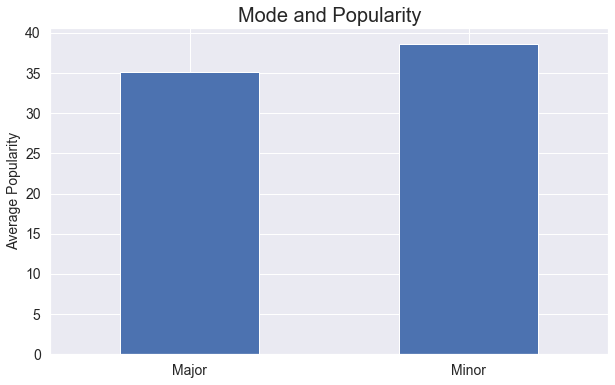

In [462]:
# whats more popular, major or minor key songs
df.groupby('modes')['popularity'].mean().plot(kind='bar',
                                             figsize=(10,6),
                                              fontsize=14,
                                             rot='horizontal')
plt.title("Mode and Popularity", fontdict={'fontsize':20})
plt.ylabel('Average Popularity', fontdict={'fontsize':14})
plt.xlabel('');

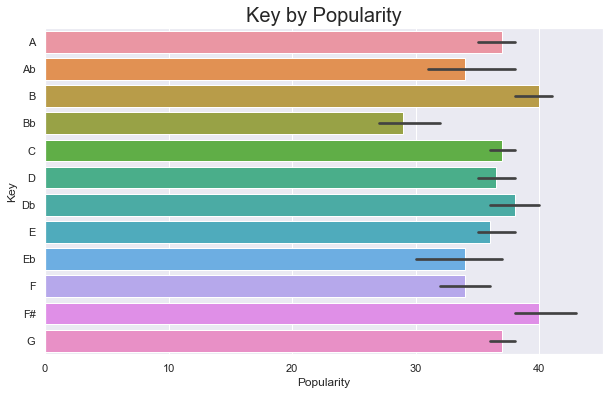

In [463]:
# look at key by popularity
plt.figure(figsize=(10,6))
sns.barplot(y=df['letter_keys'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity")
plt.ylabel("Key")
plt.title("Key by Popularity", fontdict={'fontsize':20});

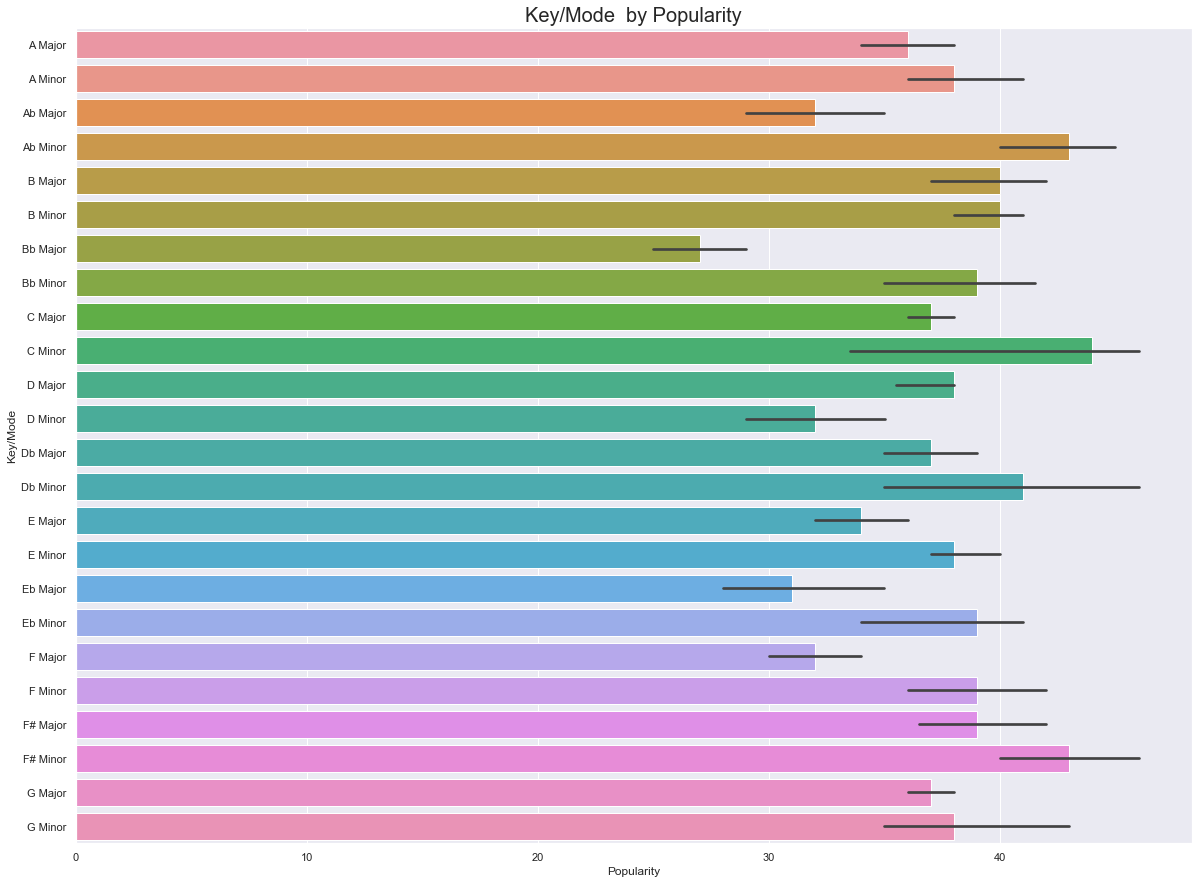

In [551]:
plt.figure(figsize=(20,15))
sns.barplot(y=df['key_mode'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity", fontdict={'fontsize':12})
plt.ylabel("Key/Mode", fontdict={'fontsize':12})
plt.title("Key/Mode  by Popularity", fontdict={'fontsize':20});

## Record label summary by attribute

In [466]:
song_char = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

label_sum_df = df.groupby('label')['acousticness', 'danceability', 'energy', 'instrumentalness',\
                                   'liveness', 'speechiness', 'valence'].mean()

label_sum_df

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
label,,,,,,,
4AD,0.279961,0.472418,0.562399,0.247659,0.177847,0.045624,0.445027
Dead Oceans,0.328258,0.439210,0.513146,0.326451,0.165757,0.047690,0.402330
Fat Possum,0.420300,0.551361,0.505139,0.075654,0.192469,0.061303,0.575210
Matador,0.255059,0.470882,0.671690,0.256433,0.207948,0.059383,0.471008
Sub Pop,0.191383,0.467457,0.686697,0.190806,0.196339,0.055320,0.468853
Temporary Residence,0.471849,0.423383,0.403742,0.531453,0.155975,0.054896,0.319010
Third Man,0.599442,0.542683,0.490107,0.081330,0.225435,0.064767,0.608405
Touch and Go,0.142653,0.504516,0.699587,0.337755,0.201535,0.062772,0.444885
XL,0.325013,0.520409,0.602645,0.196815,0.182411,0.070739,0.477185


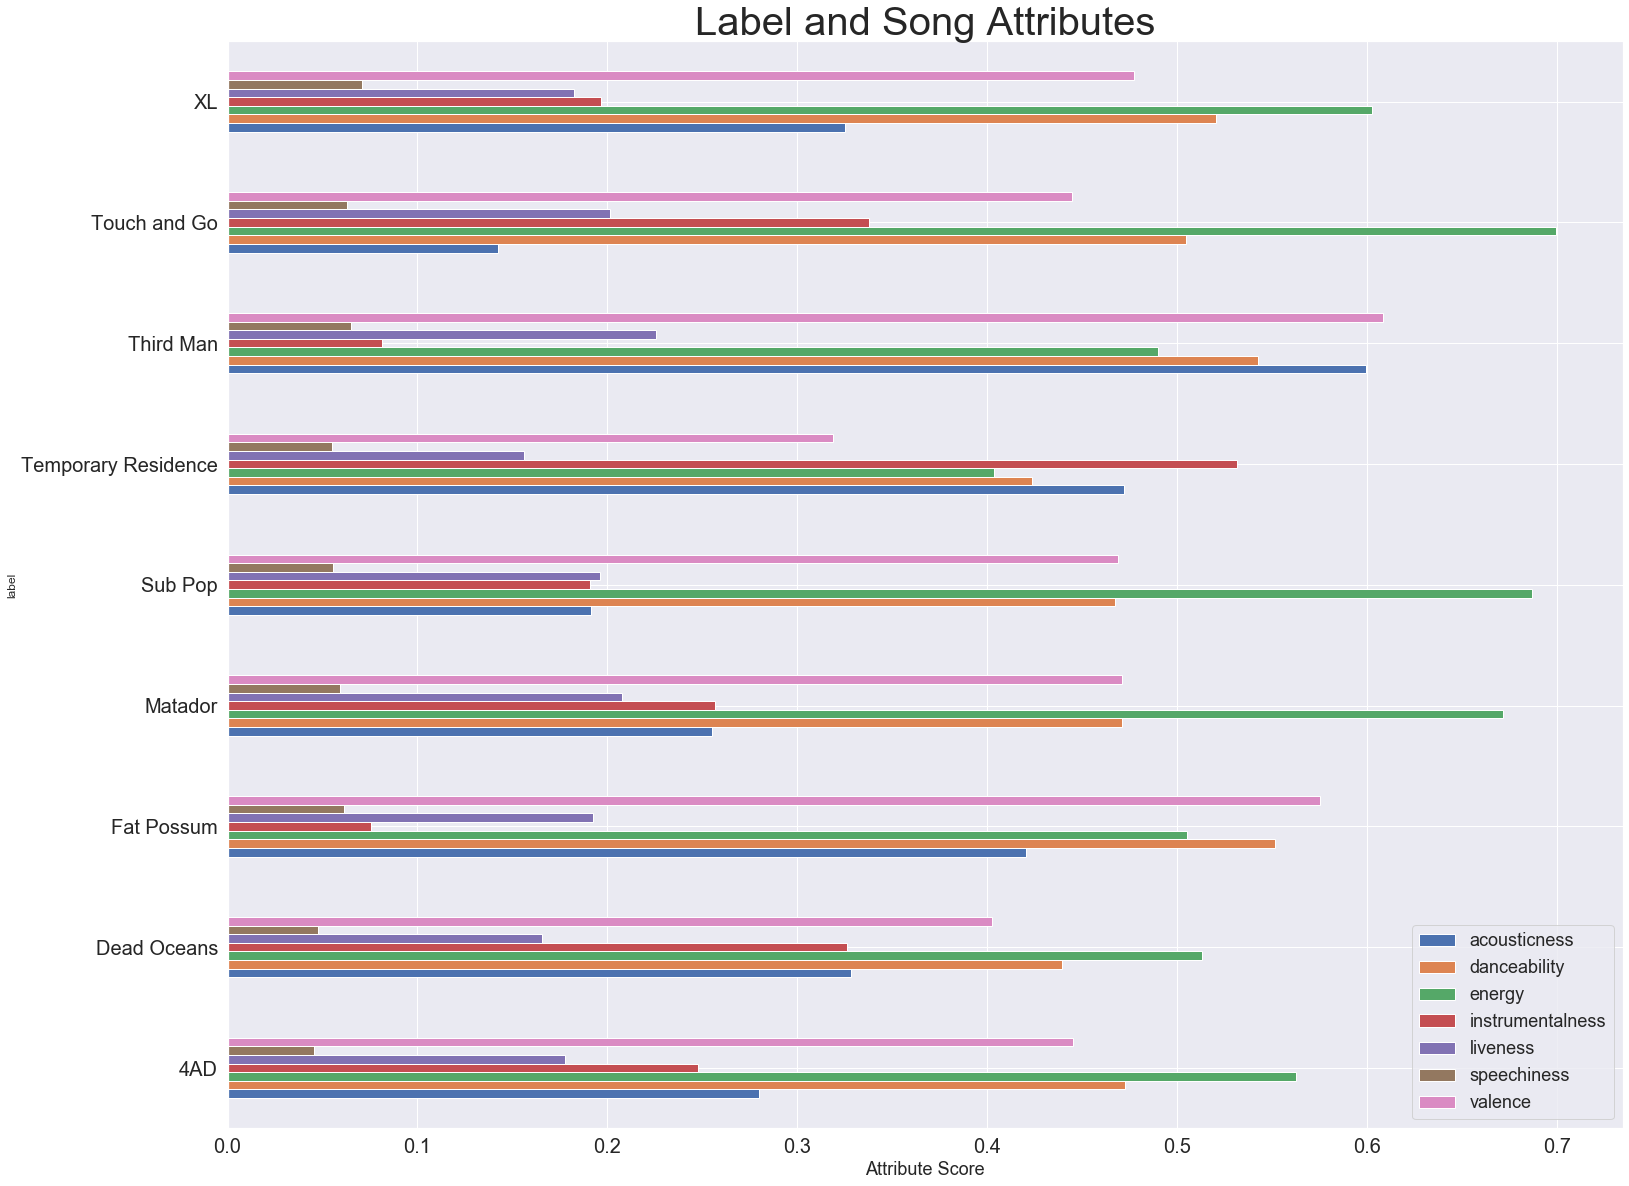

In [563]:
# visualize the above df
fig = label_sum_df.plot(kind='barh', 
                  by='label', 
                  figsize=(25,20),
                 title='Label and Song Attributes',
                fontsize=20)
fig.set_xlabel('Attribute Score', fontdict={'fontsize':18})
fig.title.set_size(40)
fig.legend(fontsize=18, loc='best');

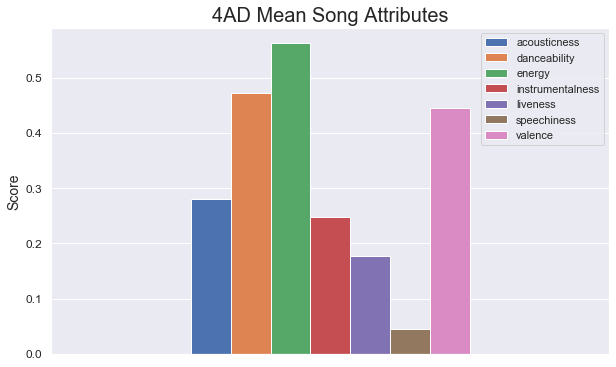

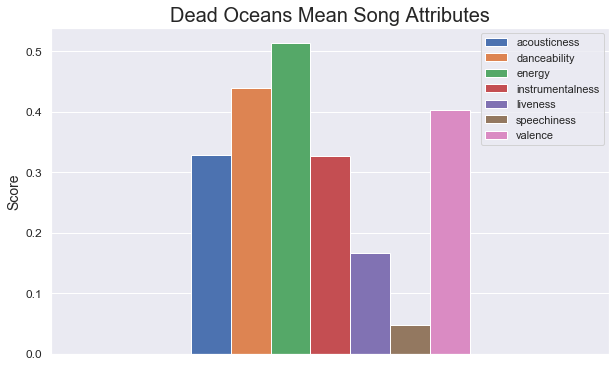

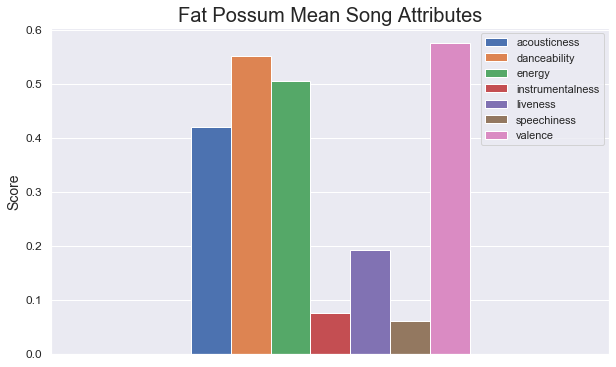

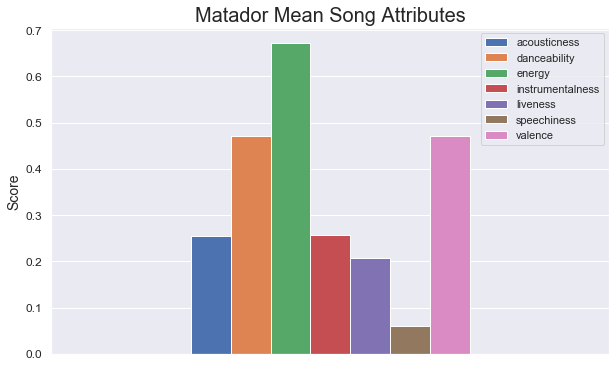

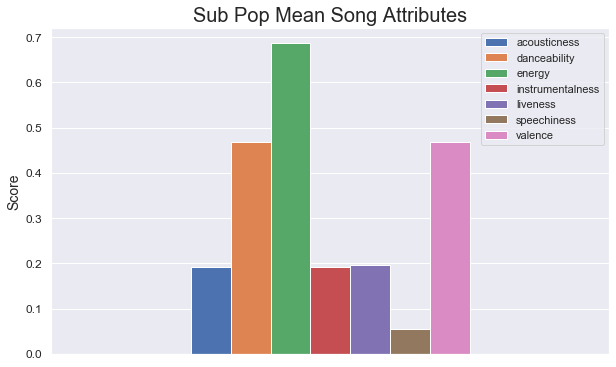

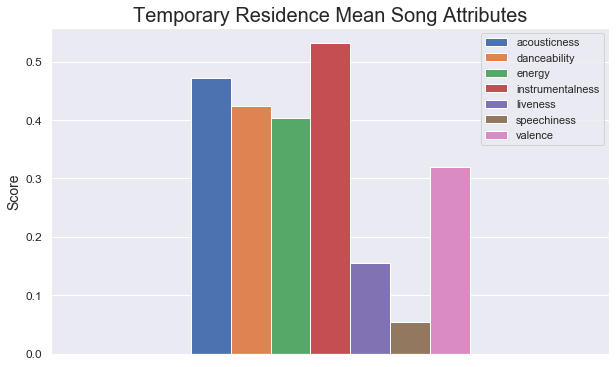

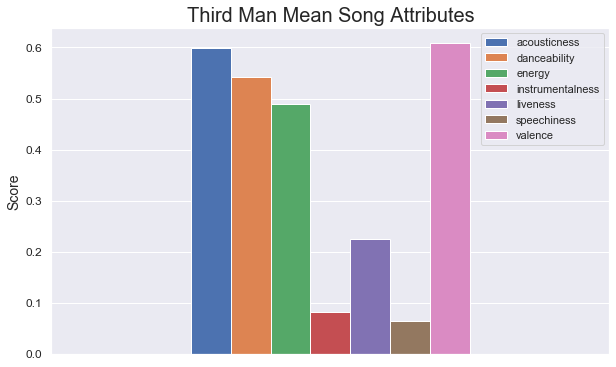

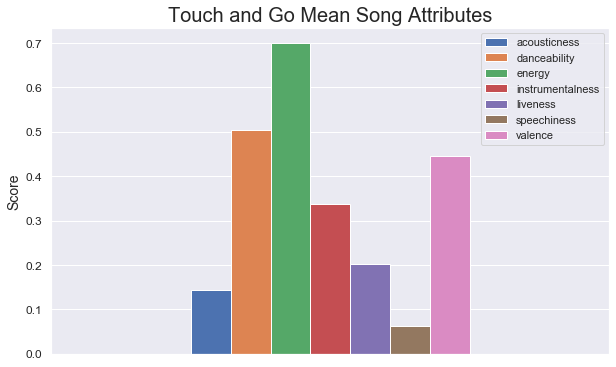

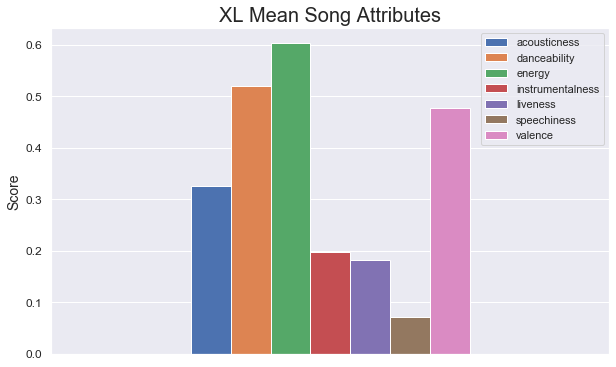

In [548]:
# summary of song charactieristics by label
label_list = label_sum_df.index
for label in label_list:
    label_sum_df.loc[[label]].plot(kind='bar',
                            figsize=(10,6),
                                  fontsize=12,
                                  rot='horizontal')
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)
    plt.xlabel('')
    plt.ylabel('Score', fontdict={'fontsize':14})
    plt.title(label=label + " Mean Song Attributes", fontdict={'fontsize':20});

In [468]:
## artist count per label
df.groupby('label')['artist'].count()

label
4AD                     473
Dead Oceans              81
Fat Possum              615
Matador                 486
Sub Pop                 964
Temporary Residence      48
Third Man              3608
Touch and Go             62
XL                      446
Name: artist, dtype: int64

### Include Scaled Features

In [469]:
# group averaged song attributes for all continuous features, by records label
continuous_features = ['scaled_loudness', 'scaled_tempo','scaled_pop', 'scaled_duration', 'scaled_speech',
                    'valence',  'liveness', 'instrumentalness', 'energy', 'danceability', 'acousticness']
grouped_by_label = df.groupby('label')[continuous_features].mean()
grouped_by_label.sample(5)

,scaled_loudness,scaled_tempo,scaled_pop,scaled_duration,scaled_speech,valence,liveness,instrumentalness,energy,danceability,acousticness
label,,,,,,,,,,,
4AD,0.761537,0.510009,0.424841,0.042505,0.186986,0.445027,0.177847,0.247659,0.562399,0.472418,0.279961
Dead Oceans,0.775936,0.477911,0.485309,0.046522,0.195455,0.402330,0.165757,0.326451,0.513146,0.439210,0.328258
Third Man,0.767209,0.481510,0.305261,0.034241,0.265443,0.608405,0.225435,0.081330,0.490107,0.542683,0.599442
Touch and Go,0.775950,0.524831,0.399677,0.041064,0.257269,0.444885,0.201535,0.337755,0.699587,0.504516,0.142653
Sub Pop,0.806493,0.523999,0.431286,0.043071,0.226728,0.468853,0.196339,0.190806,0.686697,0.467457,0.191383


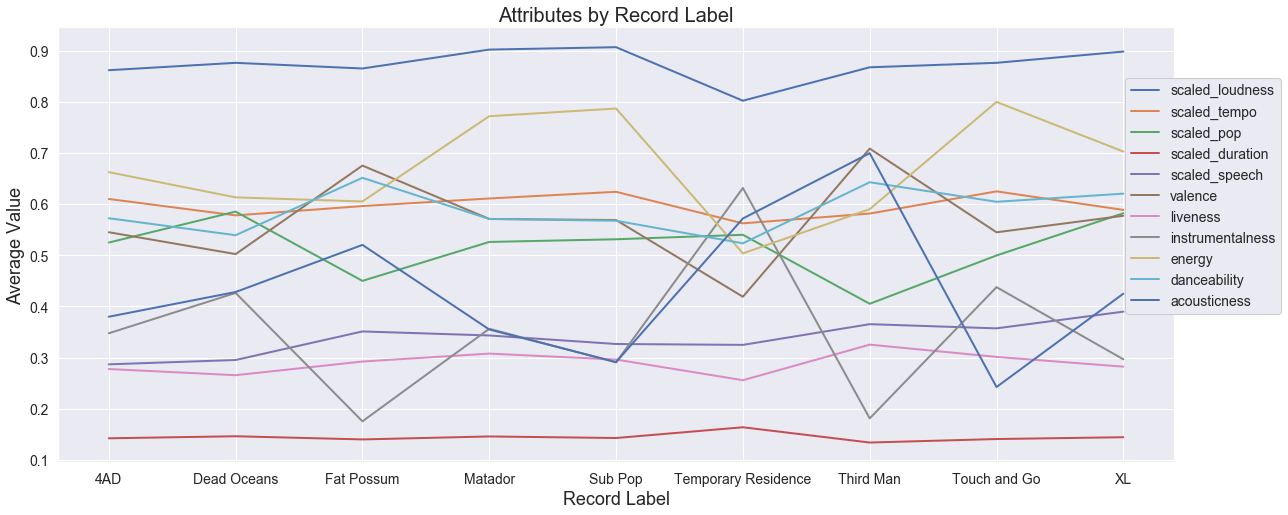

In [470]:
# plot the above dataframe
plt.figure(figsize=(20, 8))
for feat in continuous_features:
    x = grouped_by_label[feat]
    ax= sns.lineplot(x=x.index,y=x,label=feat,linewidth = 2, seed=4)

ax.set_title('Attributes by Record Label', fontsize=20);
ax.set_ylabel('Average Value', fontsize=18);
ax.set_xlabel('Record Label', fontsize=18);
ax.legend(prop=dict(size=14), loc='best', bbox_to_anchor=(.95, .9), framealpha=1.0);
ax.set_xticklabels(fontsize=14, labels=grouped_by_label.index);
ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

### Direct comparison of record labels

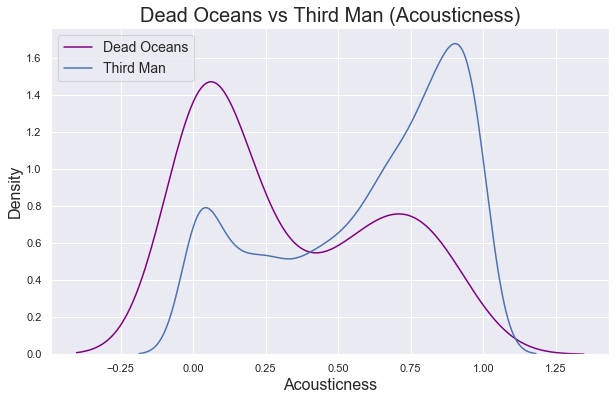

In [471]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['acousticness'][df['label'] == 'Dead Oceans'], label= 'Dead Oceans', color='purple', hist=False);
ax = sns.distplot(df['acousticness'][df['label'] == 'Third Man'], label= 'Third Man', hist=False);
ax.set_title('Dead Oceans vs Third Man (Acousticness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('Acousticness', fontsize=16);
ax.legend(prop=dict(size=14));

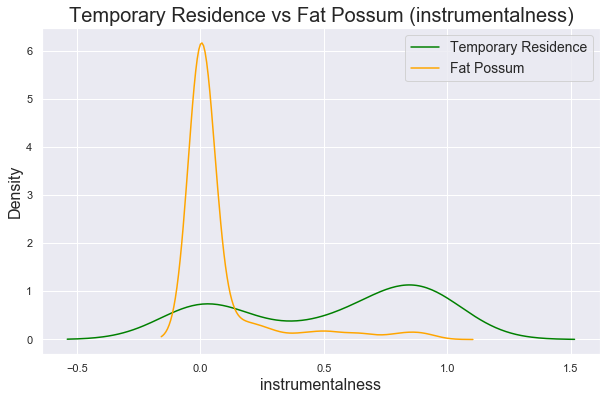

In [472]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Temporary Residence'], label= 'Temporary Residence', color='green', hist=False);
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Fat Possum'], label= 'Fat Possum',color='orange', hist=False);
ax.set_title('Temporary Residence vs Fat Possum (instrumentalness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('instrumentalness', fontsize=16);
ax.legend(prop=dict(size=14));

### Heatmap of most variant attributes

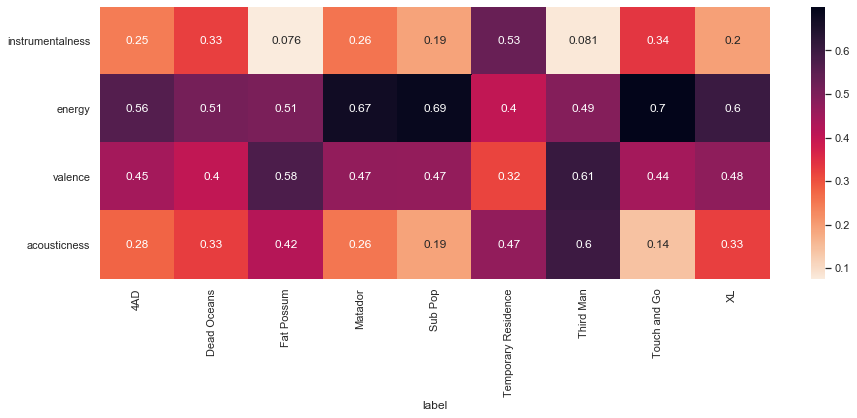

In [473]:
# pivot the table
pivoted = grouped_by_label.pivot_table(columns=grouped_by_label.index)

# make heatmap with most variant features
plt.figure(figsize=(15, 5))
ax.set_ylim(-20, 20)
sns.heatmap(pivoted.loc[['instrumentalness', 'energy', 'valence', 'acousticness']],annot=True, cmap='rocket_r');

# Statistical Tests

In [ ]:
# :-)

### Save cleaned dataframe to CSV

In [106]:
df.to_csv('data/cleaned_data.csv')

In [478]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,letter_keys,modes,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop,artist,label,decade,key_mode
0,0.968,0.589,281078,0.383,0,5DtPYDt4rEBfcH2KD2rmlA,0.04200,8,0.165,-10.225,1,Matchbox Blues (141-B),0,1935-01-01,0.243995,82.538,0.719,1935,Ab,Major,1.000000,0.051121,0.779500,0.338144,0.0,Lead Belly,Third Man,1930s,Ab Major
1,0.981,0.602,182282,0.488,0,5EVQBCdoCVmpQV4lfRLsQg,0.00308,8,0.167,-10.391,1,Death Letter Blues - Part 2 (Take 1),0,1935-01-01,0.047200,151.152,0.621,1935,Ab,Major,0.193447,0.032820,0.776901,0.619244,0.0,Lead Belly,Third Man,1930s,Ab Major
2,0.965,0.554,86753,0.446,0,571B5Z1tC8u6GhVBdhEr9D,0.68800,7,0.143,-13.002,1,Blind Lemon (Memorial Record),0,1947-01-01,0.044000,96.644,0.973,1947,G,Major,0.180332,0.015124,0.736011,0.395934,0.0,Lead Belly,Third Man,1940s,G Major
3,0.802,0.409,193123,0.672,0,1i8C8u3CVtM4NmaPGNXBNk,0.49400,9,0.313,-8.601,1,John Henry,0,1949-01-01,0.040900,145.218,0.731,1949,A,Major,0.167626,0.034828,0.804933,0.594934,0.0,Lead Belly,Third Man,1940s,A Major
4,0.838,0.599,65698,0.321,0,1lgnLRxxnFqaXxMlZNyWKj,0.00000,2,0.156,-9.407,0,Come And Sit Down Beside Me,0,1949-01-01,0.035400,87.006,0.919,1949,D,Minor,0.145085,0.011224,0.792311,0.356449,0.0,Lead Belly,Third Man,1940s,D Minor


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 0 to 6774
Data columns (total 64 columns):
acousticness        6775 non-null float64
danceability        6775 non-null float64
duration_ms         6775 non-null int64
energy              6775 non-null float64
explicit            6775 non-null int64
id                  6775 non-null object
instrumentalness    6775 non-null float64
key                 6775 non-null int64
liveness            6775 non-null float64
loudness            6775 non-null float64
mode                6775 non-null int64
name                6775 non-null object
popularity          6775 non-null int64
release_date        6775 non-null datetime64[ns]
speechiness         6775 non-null float64
tempo               6775 non-null float64
valence             6775 non-null float64
year                6775 non-null int64
decade              6775 non-null object
letter_keys         6775 non-null object
modes               6775 non-null object
scaled_speech       6

In [474]:
main_df.to_csv('data/cleaned_data_main.csv')

In [522]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 63 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null datetime64[ns]
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
decade              169909 non-null object
letter_keys       